# ADS Experiantial learning 1

### data source
https://www.kaggle.com/ankit2106/indian-general-election-2019-candidate-wise-data

#### References
https://www.kaggle.com/kerneler/starter-indian-general-election-2019-ee7ee649-b

#### Loading data using Pandas

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
election_2014=pd.read_csv('GE_india_2014_results.csv')
print(election_2014.head())

         state/ut         PC    candidate_name                      party  \
0  Andhra Pradesh  Adilabad       GODAM NAGESH  Telangana Rashtra Samithi   
1  Andhra Pradesh  Adilabad             NARESH   Indian National Congress   
2  Andhra Pradesh  Adilabad      RAMESH RATHOD               Telugu Desam   
3  Andhra Pradesh  Adilabad    RATHOD SADASHIV        Bahujan Samaj Party   
4  Andhra Pradesh  Adilabad   NETHAWATH RAMDAS                Independent   

   evm_votes  postal_votes  total_votes  Rank  
0     425762          5085       430847     1  
1     257994          1563       259557     2  
2     182879          1319       184198     3  
3      94363            57        94420     4  
4      41028             4        41032     5  


# brief statistics

In [96]:
print(election_2014.describe())

           evm_votes  postal_votes    total_votes         Rank
count    8355.000000   8355.000000    8355.000000  8355.000000
mean    62132.985398    107.407660   62240.393058     9.820467
std    140261.650370    436.090305  140535.827087     6.709299
min       105.000000      0.000000     105.000000     1.000000
25%      1708.000000      0.000000    1708.500000     5.000000
50%      4350.000000      1.000000    4354.000000     9.000000
75%     14881.000000     13.000000   14886.000000    14.000000
max    859973.000000   6792.000000  863358.000000    43.000000


# look at states

In [97]:
states_ut = pd.DataFrame(election_2014["state/ut"].unique(), columns=["state/ut"])
print ("The number of states:",len(states_ut))
states_ut

The number of states: 33


,state/ut
0,Andhra Pradesh
1,Arunachal Pradesh
2,Assam
3,Bihar
4,Goa
5,Gujarat
6,Haryana
7,Himachal Pradesh
8,Jammu & Kashmir
9,Karnataka


# total seats per state

In [98]:
seats = election_2014["state/ut"].value_counts()
states_ut["Seats"] = seats.sort_index().values
states_ut.sort_values("Seats", ascending=False)

,state/ut,Seats
30,NCT OF Delhi,1368
18,Rajasthan,945
28,Dadra & Nagar Haveli,884
4,Goa,647
1,Arunachal Pradesh,640
32,Puducherry,514
14,Meghalaya,462
17,Punjab,407
9,Karnataka,360
26,Andaman & Nicobar Islands,345


#### calculating evm and postal votes percentage

In [99]:
total_votes = pd.pivot_table(election_2014, values="total_votes", index=["state/ut"], aggfunc="sum")
states_ut["Total Voters"] = total_votes.sort_index().values
states_ut

,state/ut,Seats,Total Voters
0,Andhra Pradesh,16,190328
1,Arunachal Pradesh,640,48367188
2,Assam,13,596956
3,Bihar,176,15085883
4,Goa,647,35885332
5,Gujarat,18,453455
6,Haryana,12,165286
7,Himachal Pradesh,5,87233
8,Jammu & Kashmir,21,817000
9,Karnataka,360,25824003


In [100]:
evm_votes=pd.pivot_table(election_2014, values="evm_votes", index=["state/ut"], aggfunc="sum")
states_ut['evm voters']=evm_votes.sort_index().values
states_ut

,state/ut,Seats,Total Voters,evm voters
0,Andhra Pradesh,16,190328,190213
1,Arunachal Pradesh,640,48367188,48128478
2,Assam,13,596956,580764
3,Bihar,176,15085883,15080006
4,Goa,647,35885332,35870439
5,Gujarat,18,453455,453324
6,Haryana,12,165286,165286
7,Himachal Pradesh,5,87233,87228
8,Jammu & Kashmir,21,817000,814647
9,Karnataka,360,25824003,25700134


In [101]:
states_ut['evm_voters_per']=(states_ut['evm voters']/states_ut['Total Voters'])*100
states_ut

,state/ut,Seats,Total Voters,evm voters,evm_voters_per
0,Andhra Pradesh,16,190328,190213,99.939578
1,Arunachal Pradesh,640,48367188,48128478,99.506463
2,Assam,13,596956,580764,97.287572
3,Bihar,176,15085883,15080006,99.961043
4,Goa,647,35885332,35870439,99.958498
5,Gujarat,18,453455,453324,99.971111
6,Haryana,12,165286,165286,100.000000
7,Himachal Pradesh,5,87233,87228,99.994268
8,Jammu & Kashmir,21,817000,814647,99.711995
9,Karnataka,360,25824003,25700134,99.520334


#### Python function for finding candidate won

In [102]:
def candidate_won(state,PC,num=1):
    x=election_2014[(election_2014['state/ut']==state)&(election_2014['PC']==PC)&(election_2014['Rank']==1)]
    y=x['candidate_name']
    return y

In [103]:
print(candidate_won('Puducherry','Puducherry'))

8324    R.K.R. ANANTHARAMAN
Name: candidate_name, dtype: object


#### Python function for all parties and total num of seats in a state 

In [104]:
def parties(state):
    fig,ax=plt.subplots()
    fig.set_size_inches(20,10)
    df=election_2014[election_2014['state/ut']==state]
    g=sns.countplot(x='party',data=df)
    plt.xticks(rotation='vertical')
    plt.title('All Parties in State')
    return g

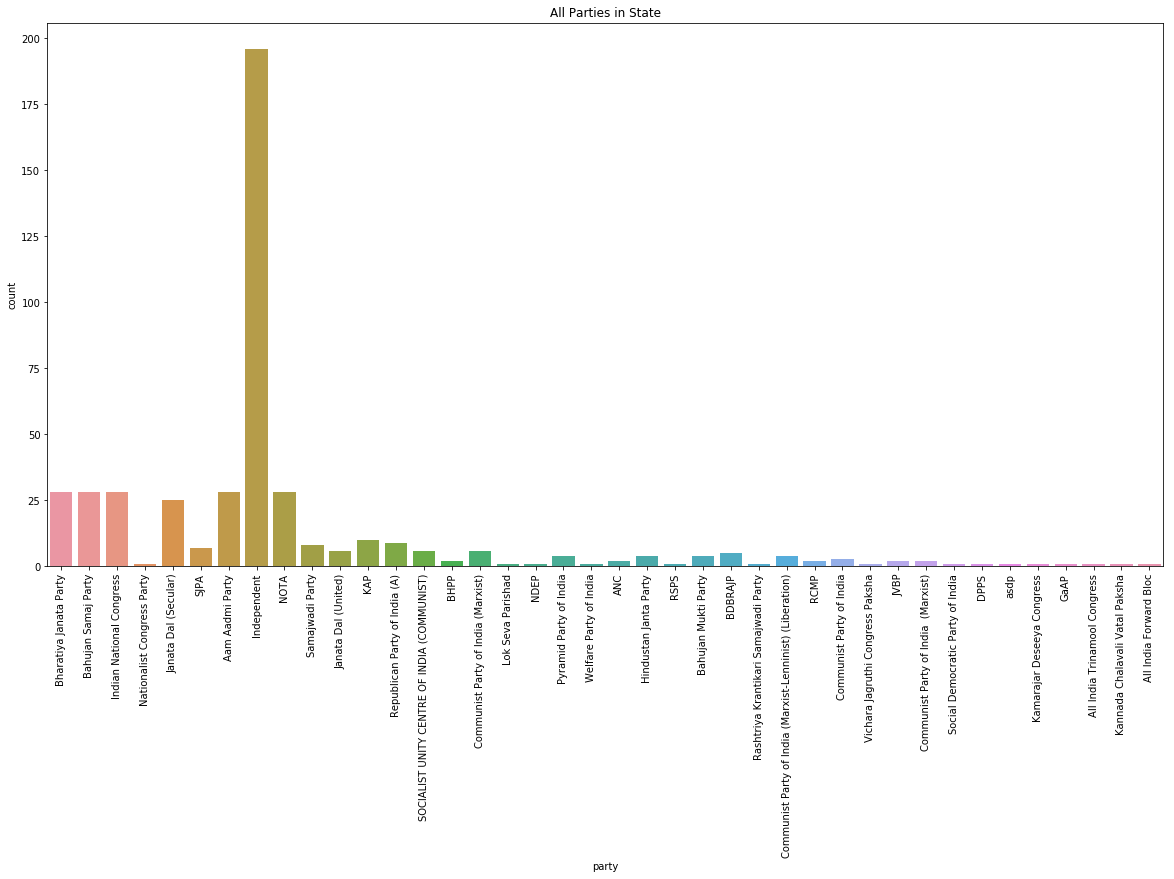

In [105]:
parties('Karnataka')

#### function to know how many seats did the party won

In [110]:
winners=election_2014[election_2014['Rank']==1]
winners

,state/ut,PC,candidate_name,party,evm_votes,postal_votes,total_votes,Rank
0,Andhra Pradesh,Adilabad,GODAM NAGESH,Telangana Rashtra Samithi,425762,5085,430847,1
9,Andhra Pradesh,Peddapalle,DR.JANAPATI SARAT BABU,Telugu Desam,63174,160,63334,1
27,Andhra Pradesh,Karimnagar,CHENNAMANENI VIDYA SAGAR RAO,Bharatiya Janata Party,213836,992,214828,1
45,Andhra Pradesh,Nizamabad,ENDALA LAKSHMINARAYANA,Bharatiya Janata Party,222876,2457,225333,1
62,Andhra Pradesh,Zahirabad,B.B. PATIL,Telangana Rashtra Samithi,505983,2678,508661,1
73,Andhra Pradesh,Medak,KALVAKUNTLA CHANDRASEKHAR RAO,Telangana Rashtra Samithi,655484,2008,657492,1
87,Andhra Pradesh,Malkajgiri,KARUNAKAR.R,Bahujan Samaj Party,6111,22,6133,1
118,Andhra Pradesh,Secundrabad,M.ANJAN KUMAR YADAV,Indian National Congress,183427,109,183536,1
149,Andhra Pradesh,Hyderabad,S KRISHNA REDDY,Indian National Congress,49301,9,49310,1
166,Andhra Pradesh,CHELVELLA,KONDA VISHWESHWAR REDDY,Telangana Rashtra Samithi,431084,3993,435077,1


In [107]:
def total_seats_won_by_party(party):
    x=election_2014[election_2014['party']==party].count()
    y=x['party']
    return print('the total seats by  '+   party   +'  party is',str(y))

In [108]:
total_seats_won_by_party('Independent')

the total seats by  Independent  party is 3096


WE can use map() function to add another coloumn by applying above functions to all rows